In [97]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

## Constructing feature dataframes

In [75]:
metadata = 'E:/User/bruna.fistarol/HMM/Salmonella/metadata.tab'

In [76]:
df = pd.read_csv(metadata, sep='\t', header=None, names=['Strain', 'Antibiotic', 'MIC'])

In [171]:
df

,t-SNE1,t-SNE2,t-SNE3
0,-37.654369,-24.343689,50.697460
1,7.484917,-3.565289,22.945232
2,-17.349306,6.300583,-21.455198
3,23.991734,-6.778328,19.966801
4,-21.122068,-25.681919,17.981833
...,...,...,...
1391,-30.232519,99.289894,-35.466927
1392,-13.031711,84.885582,-72.391975
1393,20.258684,88.118874,-19.369297
1394,44.447216,-49.422855,-47.643543


In [78]:
pivot_df = df.pivot_table(index='Strain', columns='Antibiotic', values='MIC', aggfunc='first')

In [79]:
pivot_df.columns = pivot_df.columns.str.rstrip(':MIC')

In [80]:
pivot_df

Antibiotic,AMP,AUG,AXO,CHL,FIS,FOX,GEN,KAN,STR,TET,TIO
Strain,,,,,,,,,,,
SRR1177335,1.0,1.0,1.0,1.0,NaN,1.0,4.0,NaN,4.0,4.0,1.0
SRR1177356,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,4.0,1.0
SRR1177360,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
SRR1177369,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,4.0,4.0,1.0
SRR1181521,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
SRR4280629,1.0,1.0,1.0,1.0,1.0,1.0,4.0,NaN,4.0,1.0,1.0
SRR4280640,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,4.0,4.0,1.0
SRR4280641,1.0,1.0,1.0,1.0,4.0,1.0,1.0,NaN,1.0,4.0,1.0


### Creating a table for each antibiotic

In [90]:
# A dictionary to store individual dataframes
dfs = {}

# Split each column into a new dataframe
for col in pivot_df.columns:
    dfs[col] = pivot_df[[col]].dropna()

### Add e-values for each susceptibility profile

In [82]:
hmm_search_path = 'E:/User/bruna.fistarol/HMM/Salmonella/Pfam_hmm_search'

In [91]:
for pfam in os.listdir(hmm_search_path):
    
    search_file = pd.read_csv(hmm_search_path + '/' + pfam, sep = '\t', comment = '#', header=None)
    s = search_file[0].str.split()
    evalues = pd.DataFrame(s.tolist())
    evalues.columns = ['target_name', 'accession', 'query_name', 'accession', 'E-value_fullseq', 'score_fullseq', 'bias_fullseq', 'E-value_bestdomain', 'score_bestdomain', 'bias_bestdomain', 'exp', 'reg', 'clu', 'ov', 'env', 'dom', 'rep', 'inc', 'description_of_target']
    evalues['target_name'] = evalues['target_name'].str.rstrip('.fasta')
    evalues = evalues[['target_name', 'E-value_fullseq']].set_index('target_name', drop = True)
    evalues.rename(columns={'E-value_fullseq': f'{pfam}'.split('.')[0]}, inplace = True)
    
    for antibiotic, table in dfs.items():
        dfs[antibiotic] = pd.concat([table, evalues], axis=1)


In [92]:
dfs['AMP']

,AMP,PLF_590_00000030,PLF_590_00000052,PLF_590_00000054,PLF_590_00000074,PLF_590_00000084,PLF_590_00000090,PLF_590_00000091,PLF_590_00000093,PLF_590_00000103,...,PLF_590_00003850,PLF_590_00003867,PLF_590_00004055,PLF_590_00004695,PLF_590_00004860,PLF_590_00006292,PLF_590_00006719,PLF_590_00008356,PLF_590_00009548,PLF_590_00024086
SRR1177335,1.0,0,2.6e-161,0,0,0,0,0,0,0,...,8.8e-130,2.1e-278,2e-240,3.1e-125,4.4e-99,0,1.2e-37,4.1e-32,6.3e-119,0
SRR1177356,1.0,0,6e-161,0,0,0,0,0,0,0,...,8.8e-130,9.4e-280,1.3e-241,2.2e-125,2e-103,0,1.2e-37,5.8e-33,4.6e-119,0
SRR1177360,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR1177369,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR1181521,1.0,0,6e-161,0,0,0,0,1.1e-43,0,0,...,8.8e-130,9.4e-280,1.3e-241,1.5e-125,1.4e-102,0,4.1e-37,5.8e-33,1.5e-118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4280602,NaN,7.4e-65,2.6e-161,0,0,0,0,0,0,0,...,4.3e-129,2.5e-278,1.7e-240,1.5e-125,2e-103,0,1.2e-37,5.8e-33,3.4e-118,0
SRR4280622,NaN,7.4e-65,2.6e-161,0,0,0,0,0,0,0,...,4.3e-129,2.5e-278,1.7e-240,1.5e-125,2e-103,0,1.2e-37,5.8e-33,3.4e-118,0
SRR1951853,NaN,9.9e-65,2.6e-161,0,0,0,0,0,0,0,...,3.6e-128,5.2e-279,7.2e-241,1.5e-125,2e-103,0,1.2e-37,5.8e-33,8.4e-119,0
SRR1982193,NaN,3.6e-60,2.6e-161,0,0,0,0,0,0,0,...,8.8e-130,4.1e-279,1.2e-240,1.5e-125,8.7e-103,0,1.2e-37,5.8e-33,3.7e-118,0


We need to drop rows with NaN:

In [93]:
for antibiotic in dfs.keys():
    dfs[antibiotic].dropna(inplace = True)

In [94]:
dfs['AMP']

,AMP,PLF_590_00000030,PLF_590_00000052,PLF_590_00000054,PLF_590_00000074,PLF_590_00000084,PLF_590_00000090,PLF_590_00000091,PLF_590_00000093,PLF_590_00000103,...,PLF_590_00003850,PLF_590_00003867,PLF_590_00004055,PLF_590_00004695,PLF_590_00004860,PLF_590_00006292,PLF_590_00006719,PLF_590_00008356,PLF_590_00009548,PLF_590_00024086
SRR1177335,1.0,0,2.6e-161,0,0,0,0,0,0,0,...,8.8e-130,2.1e-278,2e-240,3.1e-125,4.4e-99,0,1.2e-37,4.1e-32,6.3e-119,0
SRR1177356,1.0,0,6e-161,0,0,0,0,0,0,0,...,8.8e-130,9.4e-280,1.3e-241,2.2e-125,2e-103,0,1.2e-37,5.8e-33,4.6e-119,0
SRR1181521,1.0,0,6e-161,0,0,0,0,1.1e-43,0,0,...,8.8e-130,9.4e-280,1.3e-241,1.5e-125,1.4e-102,0,4.1e-37,5.8e-33,1.5e-118,0
SRR1181532,1.0,0,2.6e-161,0,0,0,0,0,0,0,...,2.1e-129,1.4e-277,1.3e-241,1.5e-125,2e-103,0,1.2e-37,5.8e-33,4.6e-119,0
SRR1181559,1.0,0,6e-161,0,0,0,0,1.1e-43,0,0,...,8.8e-130,9.4e-280,1.3e-241,1.5e-125,1.4e-102,0,4.1e-37,5.8e-33,1.5e-118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4280624,1.0,0,2.6e-161,0,0,0,0,0,0,0,...,2.1e-129,8.1e-277,1.8e-241,1.5e-125,8.7e-103,0,1.2e-37,5.8e-33,8.4e-119,0
SRR4280640,1.0,0,8.8e-161,0,0,0,0,0,0,0,...,8.8e-130,4.5e-276,6e-240,3.1e-125,4.4e-99,0,1.2e-37,4.1e-32,1.1e-118,0
SRR4280641,1.0,0,6e-161,0,0,0,0,0,0,0,...,8.8e-130,9.4e-280,3.1e-241,2.2e-125,2e-103,0,1.2e-37,5.8e-33,2.4e-118,0
SRR4280642,4.0,0,6e-161,0,0,0,0,0,0,0,...,8.8e-130,9.4e-280,3.1e-241,2.2e-125,2e-103,0,1.2e-37,5.8e-33,2.4e-118,0


# Visualizing 

In [155]:
antibiotics = list(dfs.keys())

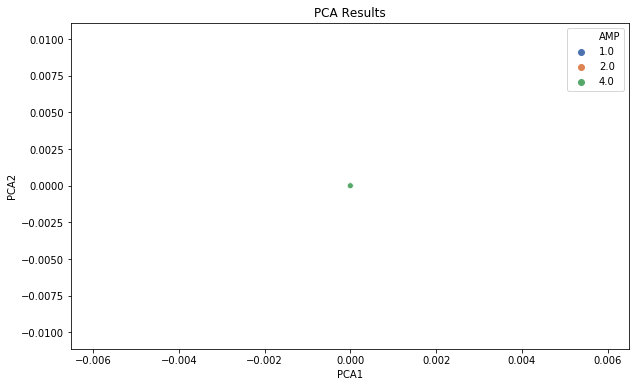

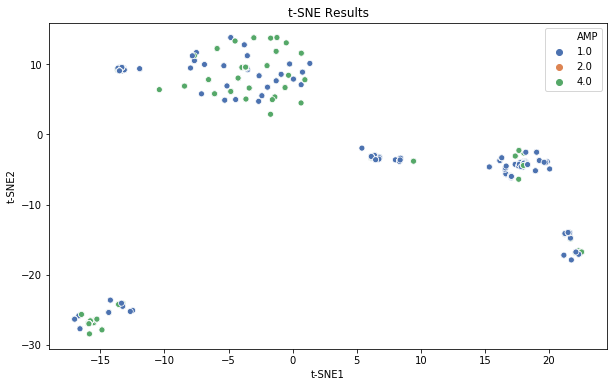

In [96]:
df = dfs['AMP']

# Separate out the features and labels
features = df.drop(columns=['AMP'])
labels = df['AMP']

# Apply PCA and reduce to two dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=labels, data=df, palette='deep')
plt.title('PCA Results')
plt.show()

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)
df['t-SNE1'] = tsne_results[:,0]
df['t-SNE2'] = tsne_results[:,1]

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=labels, data=df, palette='deep')
plt.title('t-SNE Results')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

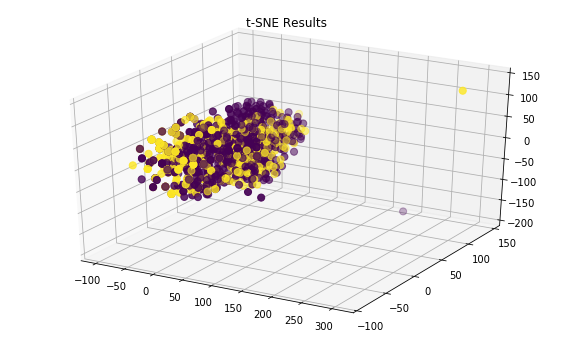

In [109]:
# Apply PCA and reduce to three dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]
df['PCA3'] = pca_result[:,2]

# Apply t-SNE with three dimensions
tsne = TSNE(n_components=3, random_state=10)
tsne_results = tsne.fit_transform(features)
df['t-SNE1'] = tsne_results[:,0]
df['t-SNE2'] = tsne_results[:,1]
df['t-SNE3'] = tsne_results[:,2]

# 3D Plot for t-SNE results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['t-SNE1'], df['t-SNE2'], df['t-SNE3'], c=labels, cmap='viridis', s=50)
ax.set_title('t-SNE Results')
plt.show()

In [128]:
def read_fasta_file(file_path):
    sequences = {}
    with open(file_path, 'r') as file:
        sequence = ''
        header = ''
        for line in file:
            if line.startswith('>'):
                if sequence and header:
                    sequences[header] = sequence
                    sequence = ''
                header = line.strip()[1:]
            else:
                sequence += line.strip()
        if sequence and header:
            sequences[header] = sequence
    return sequences

In [142]:
length_0 = ['PLF_590_00003204', 'PLF_590_00000441', 'PLF_590_00002421', 'PLF_590_00002841', 'PLF_590_00000215', 'PLF_590_00002480', 'PLF_590_00000236', 'PLF_590_00000543', 'PLF_590_00024086']

In [141]:
length_1 = list(read_fasta_file('E:/User/bruna.fistarol/HMM/Salmonella/length_1_mateosppi.fasta').keys())
length_2 = list(read_fasta_file('E:/User/bruna.fistarol/HMM/Salmonella/length_2_mateosppi.fasta').keys())
length_3 = list(read_fasta_file('E:/User/bruna.fistarol/HMM/Salmonella/length_3_mateosppi.fasta').keys())
length_4 = list(read_fasta_file('E:/User/bruna.fistarol/HMM/Salmonella/length_4_mateosppi.fasta').keys())

KeyboardInterrupt: 

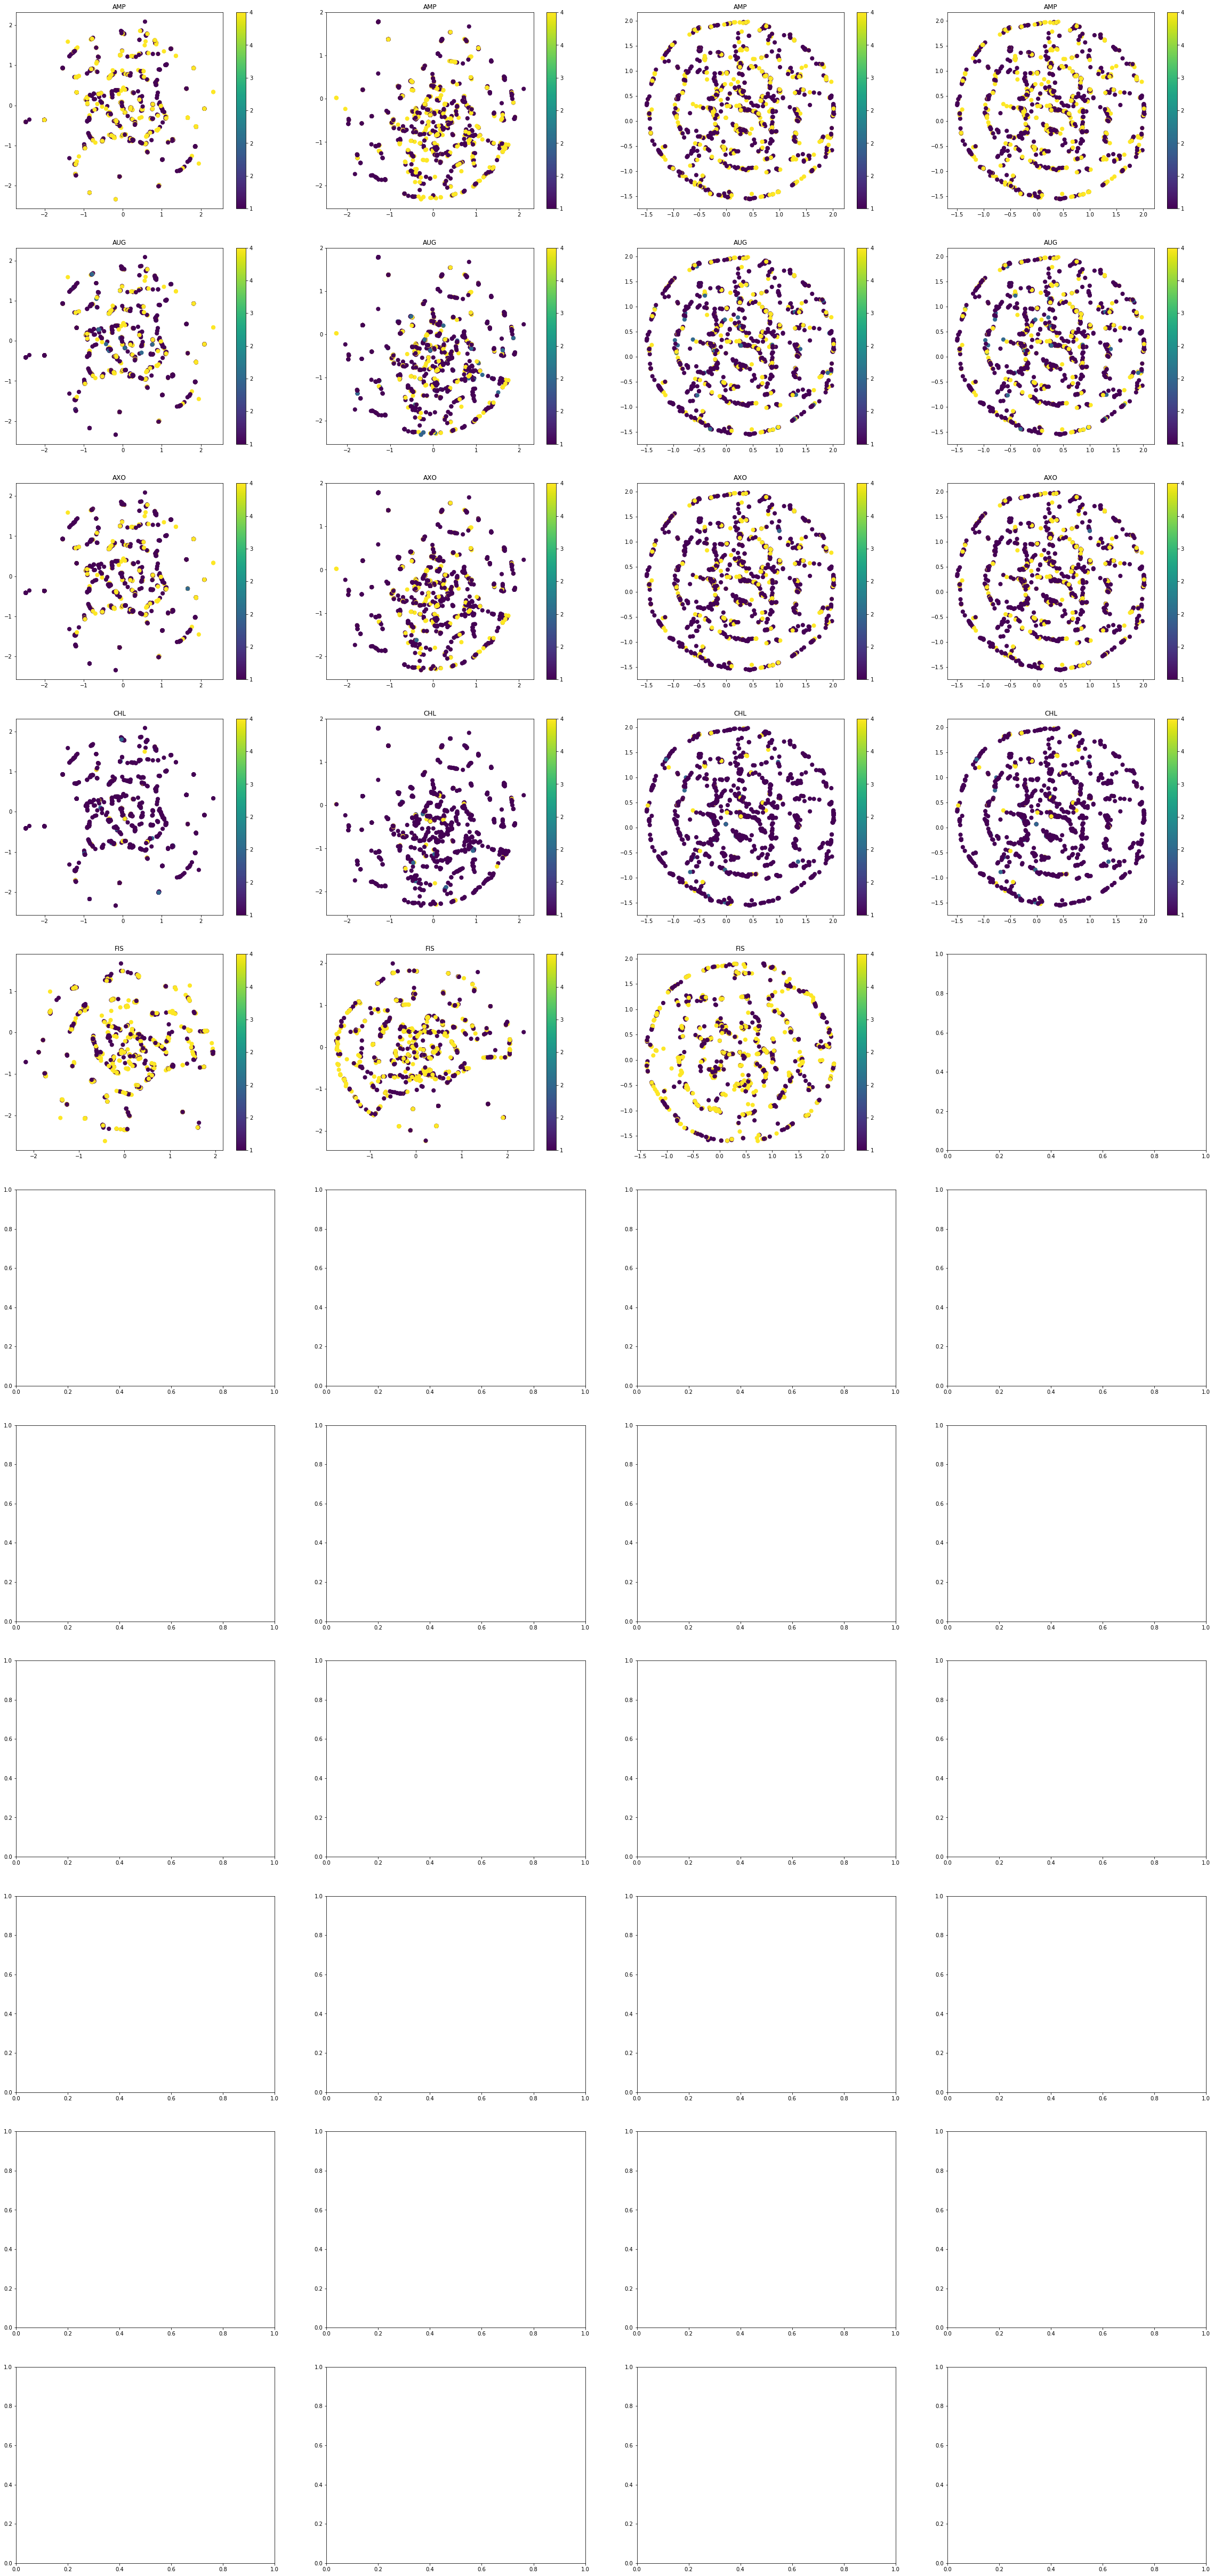

In [173]:
figure, axis = plt.subplots(nrows=len(antibiotics), ncols=4, figsize=(10*4, 8*len(antibiotics)))  # Adjusting the size to fit all plots

for row in range(len(antibiotics)):
    for col in range(4):
        data = dfs[antibiotics[row]][[antibiotics[row]] + globals()[f'length_{col + 1}']]
        features = data.drop(columns=[antibiotics[row]])
        labels = data[antibiotics[row]]
        
        # Apply t-SNE with two dimensions
        tsne = TSNE(n_components=2, random_state=10)
        tsne_results = tsne.fit_transform(features)
        
        df_tsne = pd.DataFrame()  
        df_tsne['t-SNE1'] = tsne_results[:,0]
        df_tsne['t-SNE2'] = tsne_results[:,1]

        # 2D Plot for t-SNE results
        ax = axis[row, col]  # Use the current axis
        scatter = ax.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=labels, cmap='viridis', s=50)
        ax.set_title(antibiotics[row])

        # Optionally, you can add a colorbar for clarity
        cbar = figure.colorbar(scatter, ax=ax, format='%1.0f')

plt.tight_layout() 
plt.show()

In [175]:
col=0

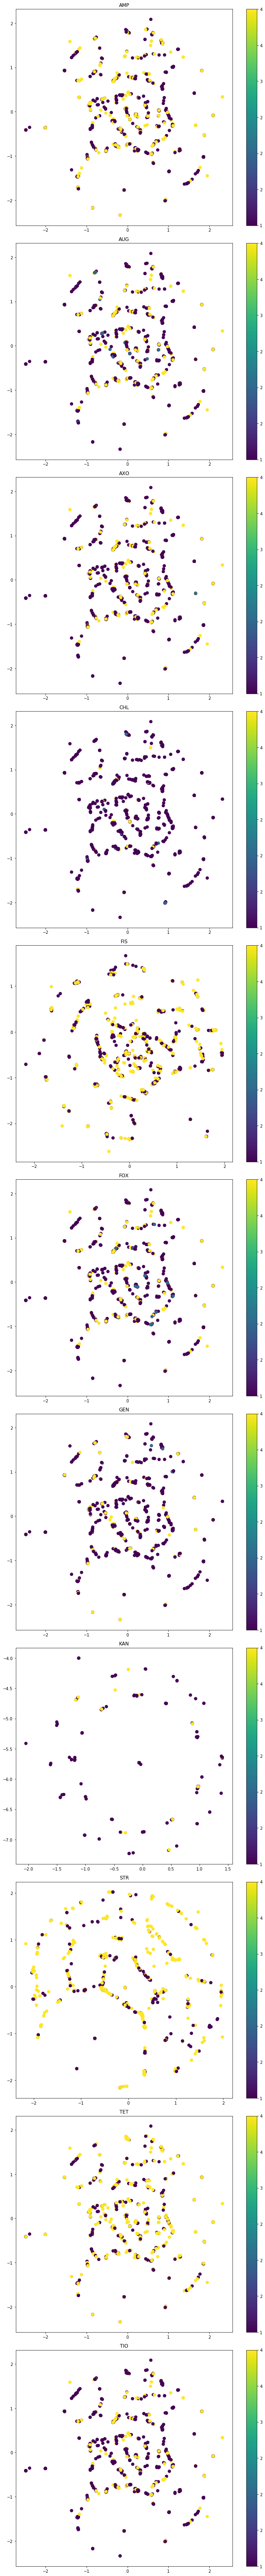

In [179]:
figure, axis = plt.subplots(nrows=len(antibiotics), ncols=1, figsize=(10, 8*len(antibiotics)))  # Adjusting the size to fit all plots

for row in range(len(antibiotics)):
    data = dfs[antibiotics[row]][[antibiotics[row]] + globals()[f'length_{col + 1}']]
    features = data.drop(columns=[antibiotics[row]])
    labels = data[antibiotics[row]]

    # Apply t-SNE with two dimensions
    tsne = TSNE(n_components=2, random_state=10)
    tsne_results = tsne.fit_transform(features)

    df_tsne = pd.DataFrame()  
    df_tsne['t-SNE1'] = tsne_results[:,0]
    df_tsne['t-SNE2'] = tsne_results[:,1]

    # 2D Plot for t-SNE results
    ax = axis[row]  # Use the current axis
    scatter = ax.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=labels, cmap='viridis', s=50)
    ax.set_title(antibiotics[row])

    # Optionally, you can add a colorbar for clarity
    cbar = figure.colorbar(scatter, ax=ax, format='%1.0f')

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib ipympl